In [1]:
from data import err_temperature
from data import err_sample_HC
from data import sample_HC
from data import temperature
from scipy.integrate import cumulative_trapezoid
import numpy as np
import matplotlib.pyplot as plt
import tools

In [2]:
# Constants

k = 1.380649e-23
r = 8.31446261815324  # J/mol.K


# Data

from data import temperature
from data import sample_HC
from data import err_sample_HC
from data import err_temperature


squared_temperature = temperature**2  # K**2
C_div_T = sample_HC/temperature  # mJ/K**2.mol
err_C_divT = err_sample_HC/temperature
err_squared_temperature = 2*temperature*err_temperature


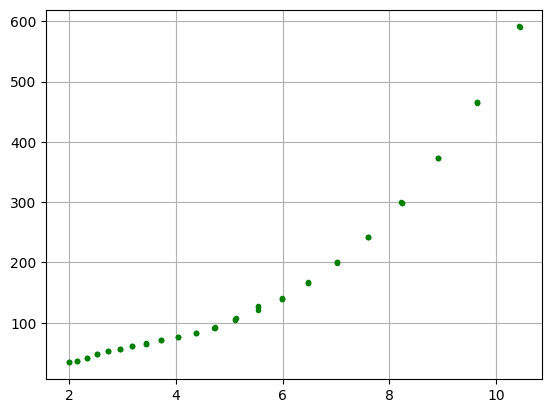

In [3]:
# Plotting the values of C/T vs T :

plt.figure()
plt.plot(temperature[0:65], sample_HC[0:65], "g.", label='C/T')
plt.grid(True)     

0.00014746639368170598 21.000000000000018
21.480000000000018


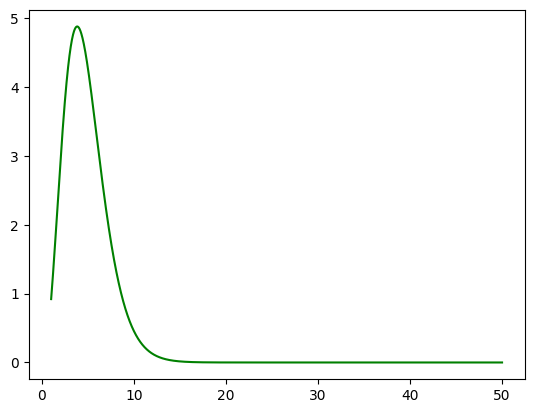

In [4]:
# test fonction intégrale

def fonction(x) :
    num = np.exp(x)*(x**4)
    denom = (np.exp(x) -1 )**2
    return num/denom

temp_test = np.arange(1, 50, 1e-2)

plt.figure()
plt.plot(temp_test, fonction(temp_test), "-g")

def zero(x, y, eps=1e-4) :
    i = 0
    for i in range(0, len(y)) :
        if y[i] < eps :
            return x[i]

print(fonction(temp_test)[2000], temp_test[2000])
print(zero(temp_test, fonction(temp_test)))

78


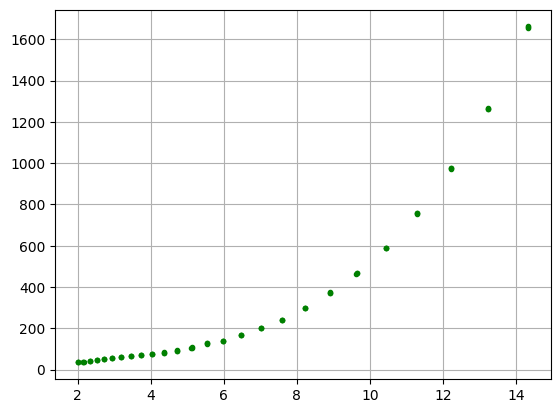

In [14]:
temperature_bounded,sample_HC_bounded = tools.tab_interval(temperature, sample_HC, 0,15)

print(len(temperature_bounded))

plt.figure()
plt.plot(temperature_bounded, sample_HC_bounded, ".g")
plt.grid(True)

In [27]:
# T = 1 K

temp_debye_test = np.arange(0, 400, 1e-1)

def fonction1(x) :
    return fonction(x)

In [28]:
def integrate_between_bounds(x, y, lower_bound, upper_bound):
    """
    Integrate y(x) between lower_bound and upper_bound using the trapezoidal rule.
    x: array-like, independent variable
    y: array-like, dependent variable
    lower_bound: float, lower integration limit
    upper_bound: float, upper integration limit
    Returns: float, definite integral of y(x) between the bounds
    """
    # Mask for values within the bounds
    mask = (x >= lower_bound) & (x <= upper_bound)
    x_selected = x[mask]
    y_selected = y[mask]
    if len(x_selected) < 2:
        return 0.0
    return np.trapz(y_selected, x_selected)


print(integrate_between_bounds(temp_debye_test, fonction1(temp_debye_test), 0.1, 400))

25.975258025525733


/tmp/ipykernel_5634/686590488.py:5: RuntimeWarning: overflow encountered in square
  denom = (np.exp(x) -1 )**2
/tmp/ipykernel_5634/686590488.py:6: RuntimeWarning: invalid value encountered in divide
  return num/denom


In [26]:
print(4*(np.pi**4)/15)

25.975757609067312
